In [1]:
import numpy as np
from scipy.stats import entropy

In [13]:
p = np.array([1,0,1,0,0])
q = np.array([0,1,1,0,0])

In [14]:
p = p/float(np.sum(p))
q = q/float(np.sum(q))

In [15]:
p,q

(array([ 0.5,  0. ,  0.5,  0. ,  0. ]), array([ 0. ,  0.5,  0.5,  0. ,  0. ]))

In [16]:
entropy(p)

0.69314718055994529

In [17]:
entropy(q)

0.69314718055994529

In [18]:
P = (p+q)/2.

In [19]:
P

array([ 0.25,  0.25,  0.5 ,  0.  ,  0.  ])

In [20]:
entropy(P) - 0.5*entropy(p) - 0.5*entropy(q)

0.34657359027997253

In [21]:
0.69314718055994529/2

0.34657359027997264

In [116]:
import pickle
import pylab as plt

In [117]:
path_data = '../'
fname = path_data+'word_dists.pkl'
with open(fname,'rb') as f_:
    x = pickle.load(f_)

In [118]:
len(x)

25

In [119]:
x[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

## looking at zipf

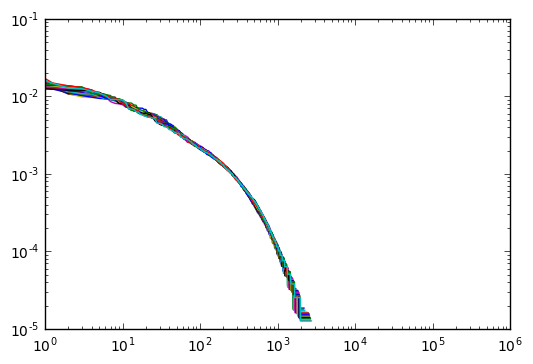

In [120]:
N = len(x)
for i in range(N):
    p = 1.0*x[i]
    p /= float(np.sum(p))
    p = np.sort(p)[::-1]
    r = np.arange(len(p))+1
    plt.loglog(r,p)
    
plt.show()

## number of types and tokens per year

In [121]:
N = len(x)
tokens = []
types = []
for i in range(N):
    p = 1.0*x[i]
    tokens += [np.sum(p)]
    types += [np.sum(p>0)]

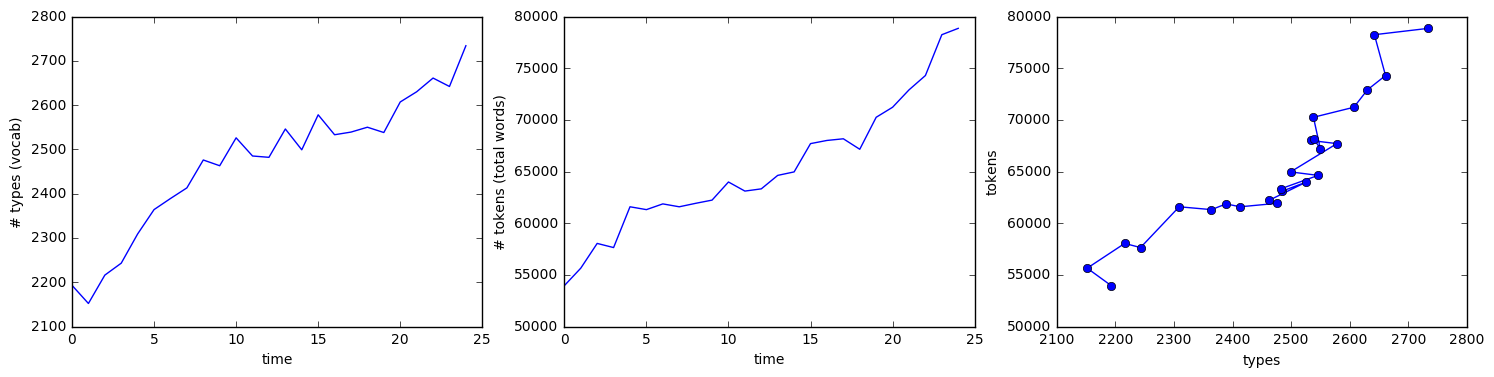

In [122]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.plot(types)
plt.xlabel('time')
plt.ylabel('# types (vocab)')
plt.subplot(132)
plt.plot(tokens)
plt.xlabel('time')
plt.ylabel('# tokens (total words)')
plt.subplot(133)
plt.plot(types,tokens,marker='o')
plt.xlabel('types')
plt.ylabel('tokens')
plt.show()

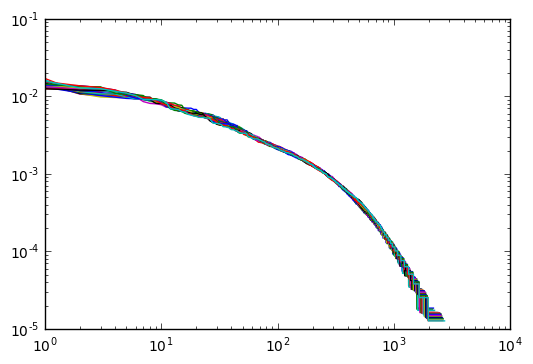

In [123]:
## now only consider the nmin most common words in each

nmin = 5000
N = len(x)
for i in range(N):
    p = 1.0*x[i]
    p = np.sort(p)[::-1][:nmin]
    p /= float(np.sum(p))
    r = np.arange(len(p))+1
    plt.loglog(r,p)
    
plt.show()

In [124]:
N = len(x)
tokens = []
types = []
for i in range(N):
    p = 1.0*x[i]
    p = np.sort(p)[::-1][:nmin]
    tokens += [np.sum(p)]
    types += [np.sum(p>0)]

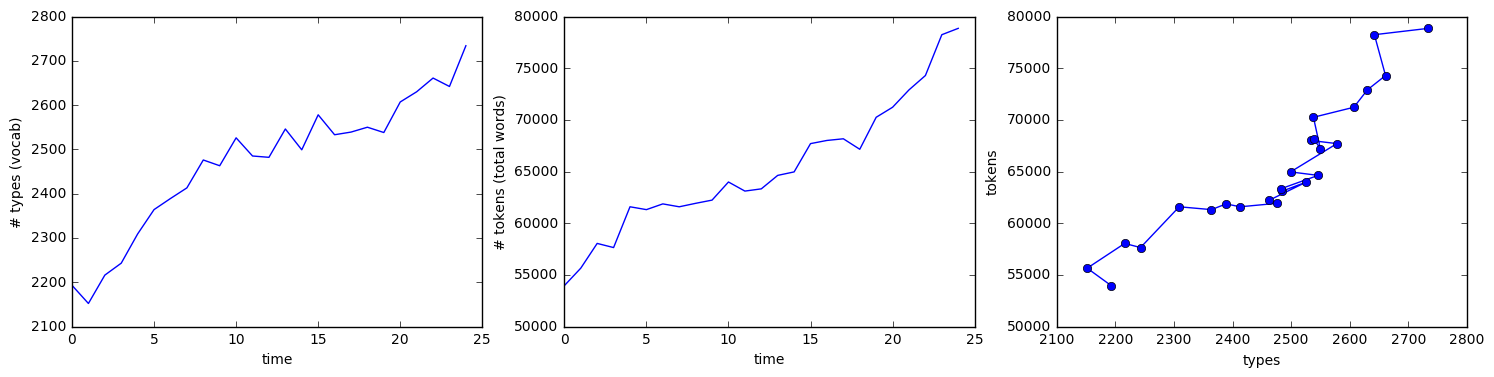

In [125]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.plot(types)
plt.xlabel('time')
plt.ylabel('# types (vocab)')
plt.subplot(132)
plt.plot(tokens)
plt.xlabel('time')
plt.ylabel('# tokens (total words)')
plt.subplot(133)
plt.plot(types,tokens,marker='o')
plt.xlabel('types')
plt.ylabel('tokens')
plt.show()

## check the length of the abstracts

In [126]:
years = np.arange(1991,2016,1)
print(years)

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [130]:
list_length_mu = []
list_length_std = []
for year in years:
    fname = 'abstracts_%s.pkl'%(str(year))
    with open(path_data+fname,'rb') as f_:
        x = pickle.load(f_)
    list_length_abs = []
    for abstract in x:
        list_length_abs += [len(abstract)]
    list_length_mu += [np.mean(list_length_abs)]
    list_length_std += [np.std(list_length_abs)]
        
#     print(len(x))

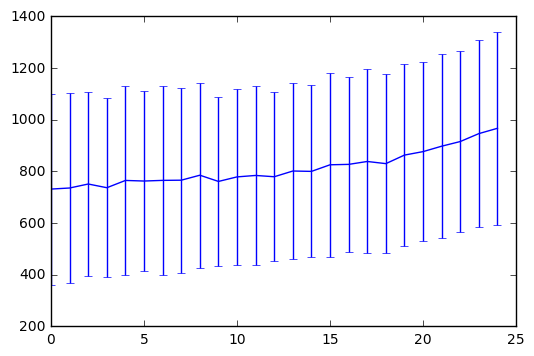

In [131]:
plt.errorbar(np.arange(len(list_length_mu)),list_length_mu,yerr=list_length_std)
plt.show()

In [132]:
(list_length_mu[-1]-list_length_mu[0])/list_length_mu[0]

0.32149168330258682